In [1]:
from PIL import Image
import numpy as np
import glob
import statistics as st

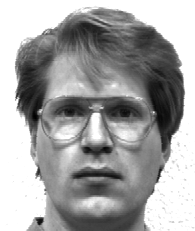

In [2]:
image = Image.open('Yale/subject01.glasses.pgm')
image

In [3]:
data =np.asarray(image)               #Input data, in any form that can be converted to an array. 

originalShape = data.shape
size = data.shape[0]*data.shape[1]


In [4]:

trainImages = glob.glob('Data/Yale_train/*.pgm')
testImages = glob.glob('Data/Yale_test/*.pgm')

In [5]:
len(trainImages)

150

In [6]:
len(testImages)

15

In [7]:
trainImages[10]

'Data/Yale_train\\subject02.centerlight.pgm'

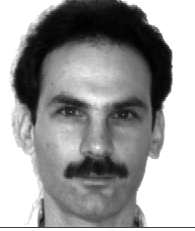

In [8]:
Image.open('Data/Yale_train\\subject02.centerlight.pgm')

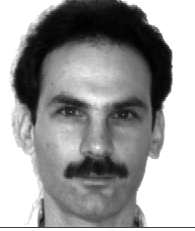

In [9]:
Image.open(trainImages[10])

In [10]:
# data1 = np.resize(np.asarray(trainImage[10]),(size))

In [11]:
trainData = np.zeros((size,150))
testData = np.zeros((size,15))

In [12]:
train_image_list = []

for i in range(len(trainImages)):
    trainImage=Image.open(trainImages[i])
    train_image_list.append(trainImage)
    data1=np.resize(np.asarray(trainImage),(size))
    trainData[:,i]=data1
    

In [13]:
trainData.shape #1st column 1st image     --> total 150 columns -> 150 images  -->   (45045->231*195)



(45045, 150)

In [14]:
data.shape

(231, 195)

In [15]:
231*195

45045

In [16]:
len(train_image_list)

150

In [17]:
test_image_list = []
for i in range(len(testImages)):
    testImage=Image.open(testImages[i])
    test_image_list.append(testImage)
    data2 = np.resize(np.asarray(testImage),(size))
    testData[:,i] = data2



In [18]:
testData.shape

(45045, 15)

In [19]:
trainData.shape

(45045, 150)

In [23]:
meanVector = np.resize(np.mean(data,axis=1),(45045,1)) #45045*1
meanVector

array([[255.        ],
       [255.        ],
       [255.        ],
       ...,
       [161.51794872],
       [161.13846154],
       [161.37435897]])

In [20]:

def PCA(data):
    dimen = data.shape
    meanVector = np.resize(np.mean(data,axis=1),(dimen[0],1)) #45045*1
    h = np.ones((1,dimen[1]))   #1*45045
    data = data - np.dot(meanVector,h)  #45045*45045 
    XTX = (1/dimen[1]-1)*np.dot(data.T,data) #45045*45045
    eigValues, eigVectors = np.linalg.eig(XTX)
    eigVecXXT = np.dot(data,eigVectors)
    return [eigValues,eigVecXXT]




In [30]:

def noOfEigenValues(eigenValues,percentage):
  dimen = eigenValues.shape
  total = np.sum(eigenValues)
  eigSum,i = 0,0
  while((eigSum/total)<percentage):
    eigSum += eigenValues[i]
    i += 1
  return i

In [31]:

vals,vecs = PCA(trainData)  #vals->eigen values 9///       vecs->eigen vector


In [32]:
vals.shape

(150,)

In [33]:
vecs.shape

(45045, 150)

In [34]:
k = noOfEigenValues(vals,0.95)  
indexDsc = list(np.argsort(vals))

In [35]:
k

64

In [39]:
#indexDsc

In [40]:
vals = vals[indexDsc]
vecs = vecs[:,np.asarray(indexDsc)]
eigenFaces = vecs[:,0:k]

In [41]:
#eigenFaces[:,1].shape

In [42]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [51]:
dimen1 = eigenFaces.shape
ans=np.zeros((231,195,dimen1[1]))


In [52]:
dimen1

(45045, 64)

#    Visualize Eigen Faces
    

image  0


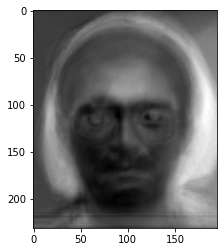

image  1


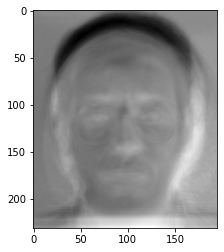

image  2


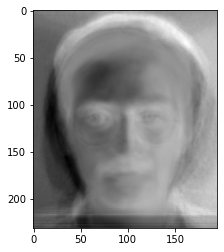

image  3


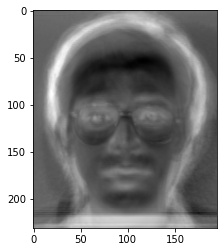

image  4


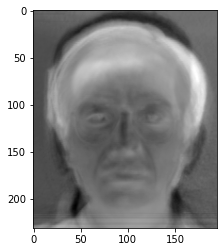

image  5


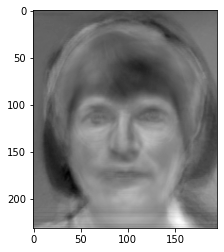

image  6


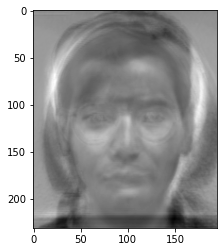

image  7


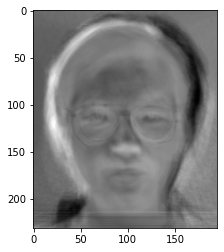

image  8


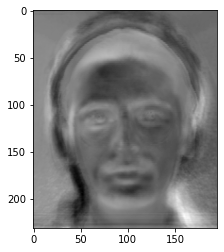

image  9


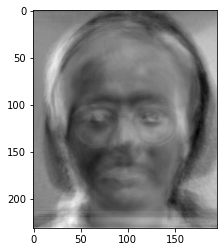

image  10


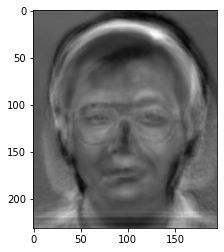

image  11


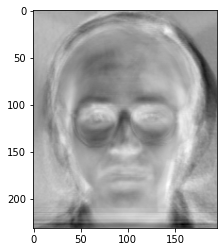

image  12


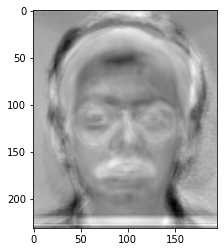

image  13


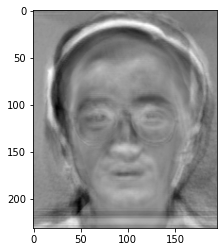

image  14


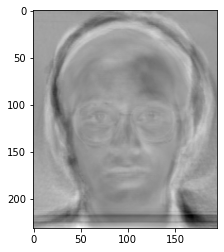

image  15


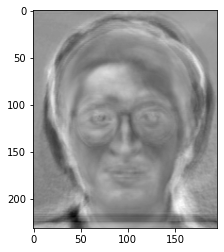

image  16


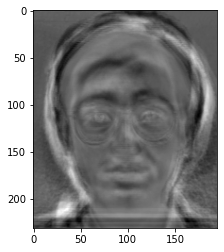

image  17


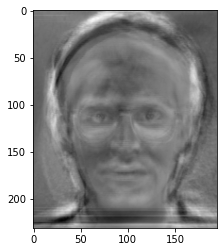

image  18


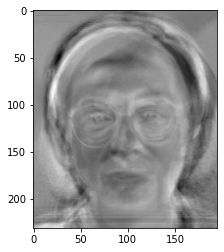

image  19


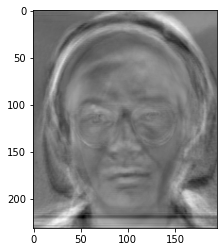

image  20


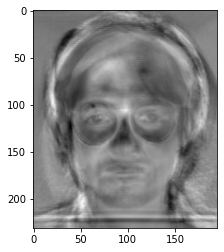

image  21


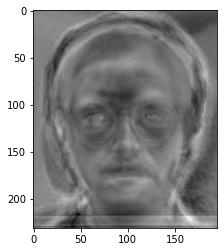

image  22


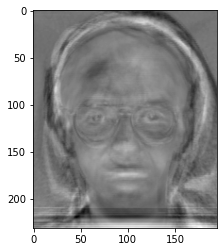

image  23


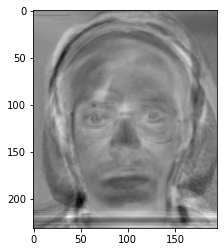

image  24


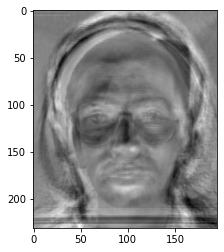

image  25


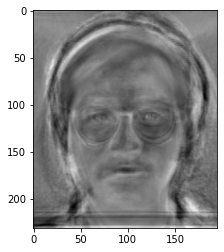

image  26


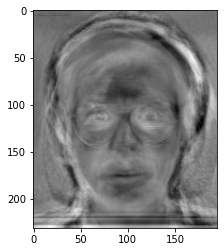

image  27


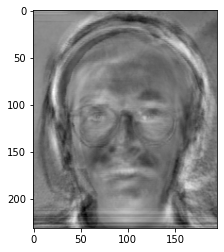

image  28


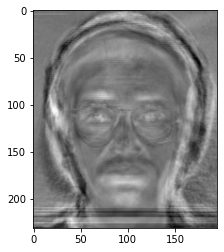

image  29


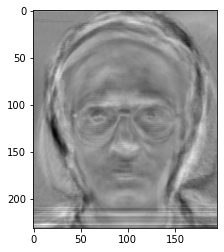

image  30


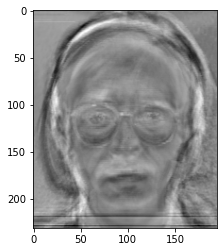

image  31


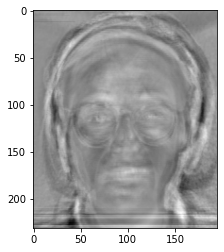

image  32


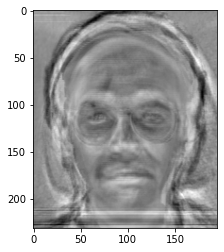

image  33


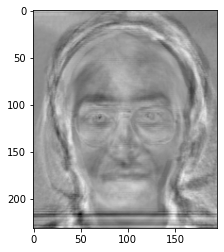

image  34


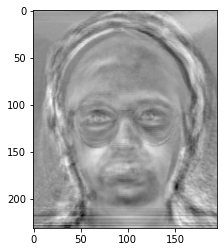

image  35


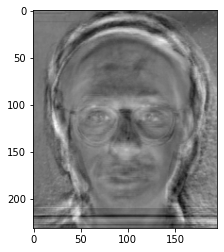

image  36


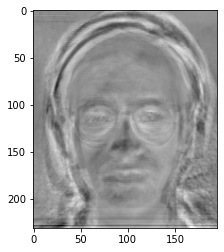

image  37


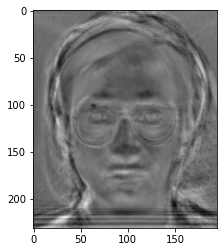

image  38


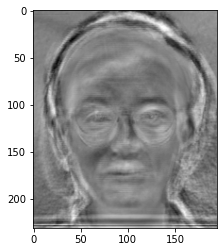

image  39


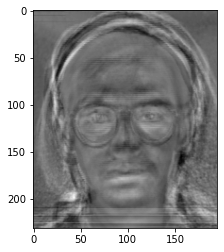

image  40


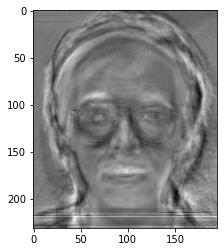

image  41


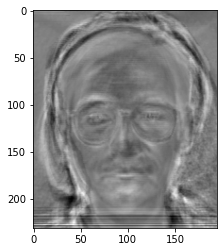

image  42


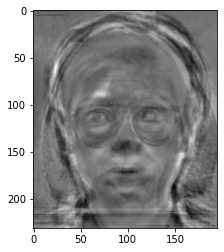

image  43


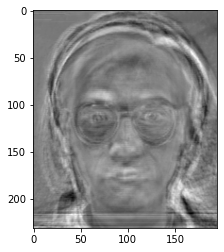

image  44


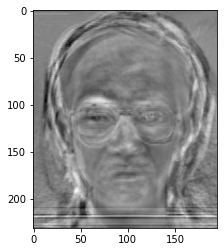

image  45


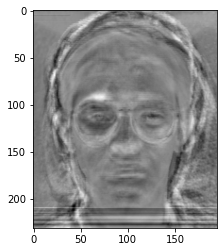

image  46


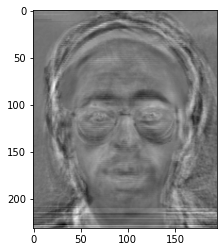

image  47


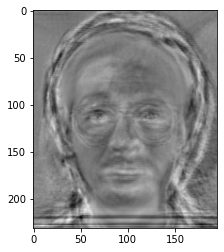

image  48


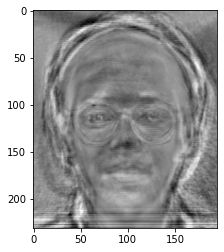

image  49


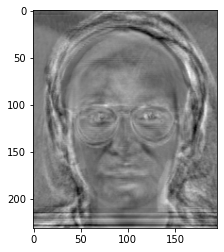

image  50


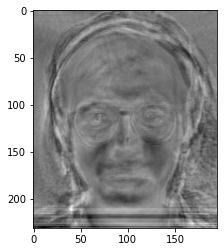

image  51


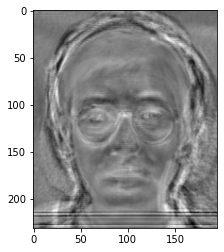

image  52


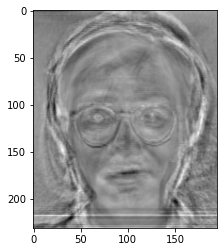

image  53


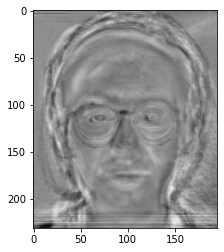

image  54


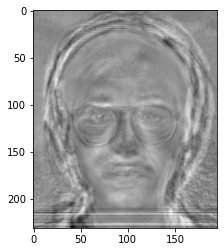

image  55


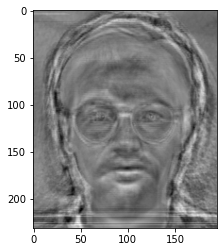

image  56


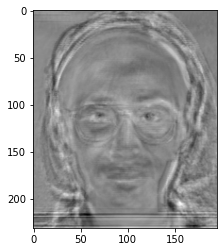

image  57


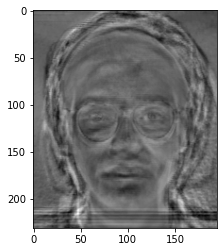

image  58


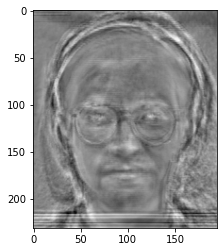

image  59


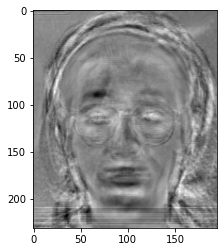

image  60


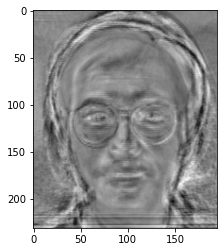

image  61


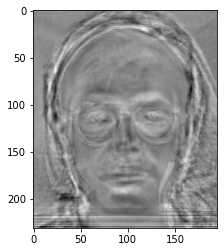

image  62


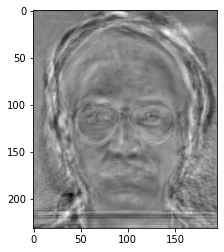

image  63


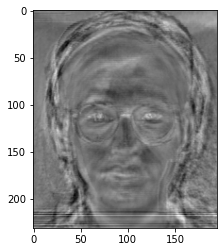

In [37]:
for i in range(dimen1[1]):
  ans[:,:,i]= np.reshape(eigenFaces[:,i],(originalShape[0],originalShape[1]))
  print("image ",i)
  #cv2_imshow(eigFace)
  #img = Image.fromarray(eigFace)
  #img.save('my.png')
  plt.imshow(ans[:,:,i],cmap='gray')
  plt.show()


In [38]:
#plt.imshow(ans[:,:,2],cmap='gray')

In [53]:
eigFace = np.reshape(eigenFaces[:,1],(originalShape[0],originalShape[1]))

In [54]:
eigFace.shape

(231, 195)

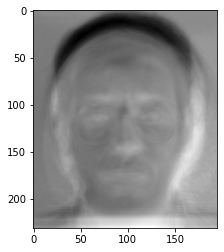

In [55]:
 plt.imshow(eigFace,cmap='gray')

In [57]:
testData.shape

(45045, 15)

In [58]:
testData[:,10]

array([255., 255., 255., ...,  66.,  66.,  66.])

In [56]:
testSample = testData[:,10]
testSample = np.reshape(testSample,(testSample.shape[0],1))

In [69]:
testSample.shape

(45045, 1)

In [63]:
eigenFaces.shape

(45045, 64)

In [71]:
M=np.linalg.pinv(eigenFaces)
M.shape

(64, 45045)

In [70]:
coeffs = np.dot(np.linalg.pinv(eigenFaces),testSample)

In [60]:
coeffs.shape

(64, 1)

In [72]:
coeffs

array([[ 0.12020955],
       [-0.14435538],
       [-0.13823244],
       [-0.14478527],
       [-0.28330662],
       [ 0.42490891],
       [ 0.22390438],
       [-0.10343475],
       [ 0.12944212],
       [ 0.34557775],
       [-0.11253216],
       [ 0.31539518],
       [ 0.05946358],
       [ 0.10354733],
       [ 0.08435282],
       [ 0.00409713],
       [-0.15351424],
       [-0.00917347],
       [ 0.00571407],
       [ 0.04014966],
       [ 0.14246147],
       [ 0.07758256],
       [ 0.12647994],
       [-0.0535931 ],
       [ 0.24483808],
       [ 0.16912267],
       [-0.041145  ],
       [ 0.11574127],
       [-0.09926538],
       [ 0.11448327],
       [-0.1530846 ],
       [-0.0743621 ],
       [-0.08632344],
       [-0.10652095],
       [ 0.15993545],
       [-0.22689169],
       [ 0.00142757],
       [ 0.25336705],
       [ 0.0109409 ],
       [-0.01025876],
       [-0.06865378],
       [ 0.10073803],
       [-0.074296  ],
       [-0.08332298],
       [-0.06239266],
       [ 0

# Test face as linear combination

In [44]:
#test face as linear combination
testSample = testData[:,10]
testSample = np.reshape(testSample,(testSample.shape[0],1))
coeffs = np.dot(np.linalg.pinv(eigenFaces),testSample)
coeffs.shape

(64, 1)

In [73]:
print("actual image")

actual image


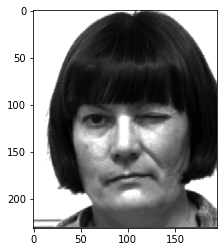

In [74]:

#cv2_imshow(np.reshape(testSample,(originalShape[0],originalShape[1])))
plt.imshow(np.reshape(testSample,(originalShape[0],originalShape[1])),cmap='gray')

linearly combined image


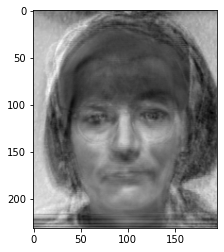

In [75]:

print("linearly combined image")
newSample = np.dot(eigenFaces,coeffs)
#cv2_imshow(np.reshape(newSample,(originalShape[0],originalShape[1])))
plt.imshow(np.reshape(newSample,(originalShape[0],originalShape[1])),cmap='gray')

In [76]:

coeffMatrix = np.zeros((64,15))
testData.shape

(45045, 15)

In [92]:
M=np.linalg.pinv(eigenFaces)
M.shape

(64, 45045)

In [90]:
testSample = testData[:,1]

In [91]:
testSample.shape

(45045,)

In [ ]:
dot=np.dot(np.linalg.pinv(eigenFaces),testSample)

In [96]:


x=np.reshape(np.dot(np.linalg.pinv(eigenFaces),testSample),(64))
x.shape

(64,)

In [86]:

coeffMatrix = np.zeros((64,15))
testData.shape
for i in range(testData.shape[1]):
  testSample = testData[:,i]
  testSample = np.reshape(testSample,(testSample.shape[0],1))
  coeffMatrix[:,i] = np.reshape(np.dot(np.linalg.pinv(eigenFaces),testSample),(64))

In [82]:
coeffMatrix.shape

(64, 15)

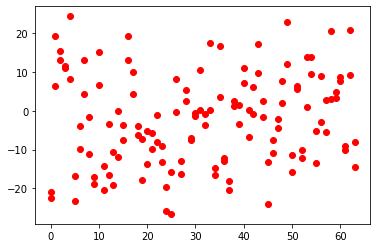

In [50]:

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
Coeffs_embedded = TSNE(n_components=2).fit_transform(coeffMatrix)
plt.plot(Coeffs_embedded,"or")